# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [163]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [215]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [164]:
# read the data
data = pd.read_csv('foodhub_order.csv')
#take the copy of data
df = data.copy()
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [217]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
The food hub dataset has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [218]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
   There are 5 numerical data columns and 4 object type data columns in the dataset.
   
   Rating is read as object type but it should be a numerical value. We'll change to float later for data calculation.
   

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [241]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing values in the given dataset.

However, there are 38.77% orders which is not rated.  

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [220]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:

Food Preparation Time:

Minimum time to prepare order is 20 minutes.

Average time to prepare order is 27 minutes.

Maximum time to prepare order is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [221]:
# Write the code here
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:

Total orders : 1898

There are 736 orders which doesn't have rating.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [222]:
# Write the code here
#Checking if there are any duplicate entries in the data
df.duplicated().sum()

0

#### Observations:

There are no duplicate entries in the data

In [223]:
# Checking no of unique Customers and total no of orders in the dataset
print('There are' ,df['order_id'].nunique(), "orders in total")
df['customer_id'].nunique()

There are 1898 orders in total


1200

#### Observations:

There are 1898 orders in total

There are 1200 unique foodhub customers in the dataset

In [224]:
#Checking the unique restaurants in the dataset
print("There are" , df['restaurant_name'].nunique(), "restaurants")

There are 178 restaurants


#### Observations:

There are 178 unique restaurants assocaited with Foodhub.

In [225]:
# Checking the unique cuisine types
df['cuisine_type'].nunique()

14

#### Observations:

There are 14 cuisine types in total

#### Observation on Cost: 

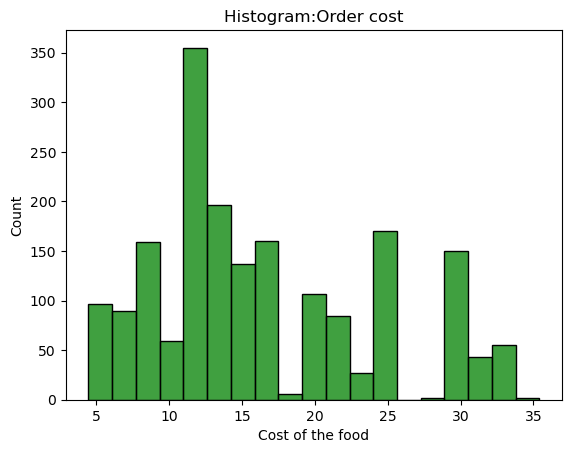

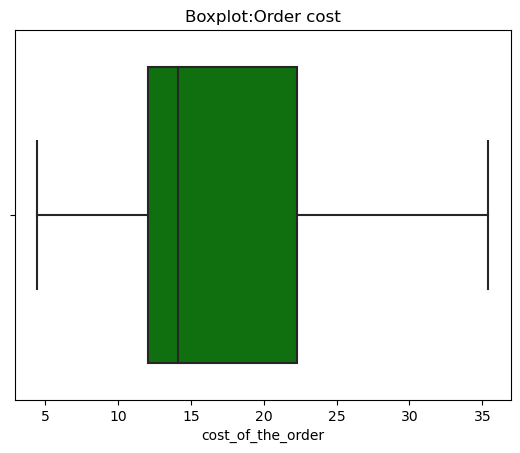

In [226]:
# Histogram plot on the order cost
plt.title('Histogram:Order cost')
plt.xlabel('Cost of the food')
plt.ylabel('Count')
sns.histplot(data=df,x='cost_of_the_order',color='green')
plt.show()

# Boxplot on the order cost
plt.title('Boxplot:Order cost')
plt.xlabel('Cost of the food')
sns.boxplot(data=df,x='cost_of_the_order',color='green') ## Boxplot for the cost of order.
plt.show() 

##### Observation on order cost:

From the box plot on order cost below are the observations:

1. The median order cost value is 14 dollars

2. The minimum order value is 4.9 dollars and the maximum order value is 35 dollars

3. It seems that there are no outliers in the order cost value and it seems to be little right skewed.



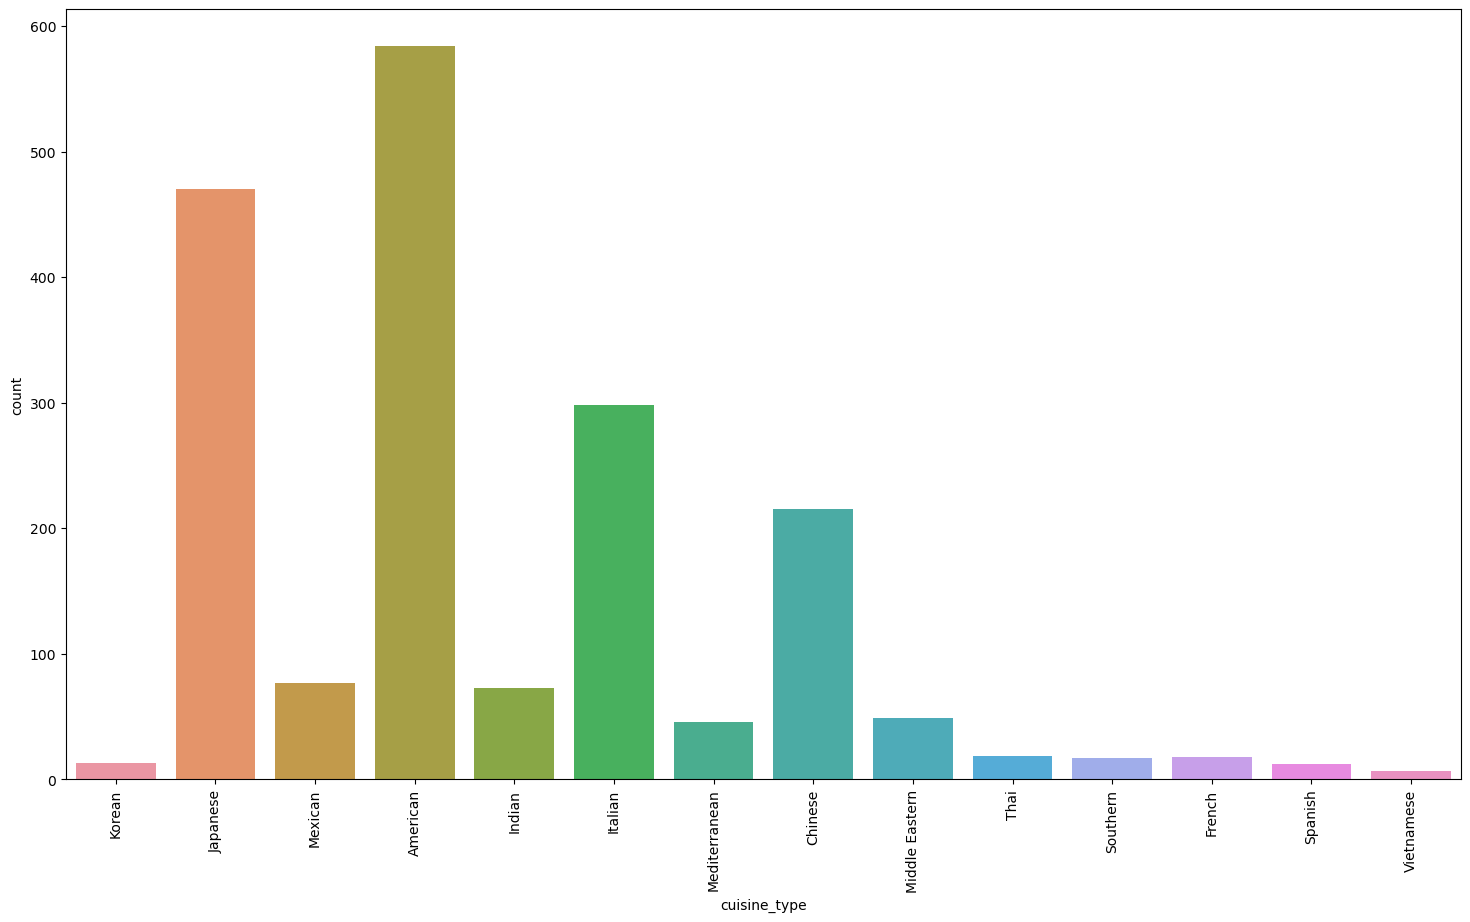

In [252]:
#Countplot on cuisine types

plt.figure(figsize=(18,10))
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation = 90)
plt.show()

##### Observation on cuisine types:

1. It has been observed that American is the most preferred cuisine by the customer with 584 orders.
2. Japanese takes the second spot with 470 orders.
3. Italian is the third cuisine with 298 orders followed by Chinese.
4. Vietnamise,Koraen, Spanish is the least preferred cuisine by the customers.

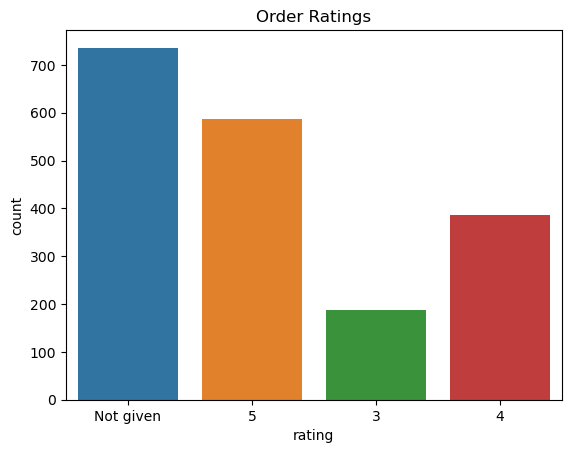

In [228]:
# Countplot on rating
plt.title("Order Ratings")
sns.countplot(data=df,x='rating')
plt.show()

##### Observation on ratings:

1. Nearly 736 orders has not been rated by customers.
2. No restaurants has rating less than 3
3. 588 orders has rating 5.
4. Nearly 386 orders has rating 4.
5. 188 orders has rating 3. 

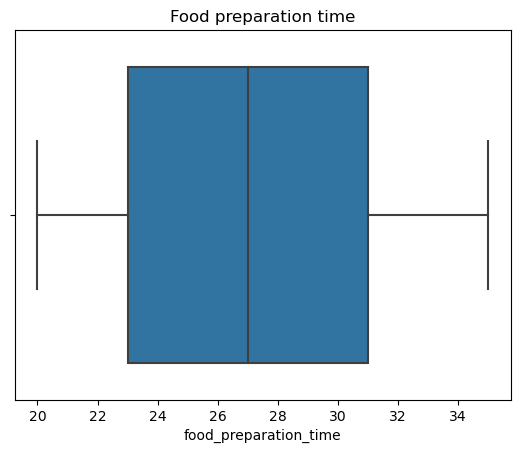

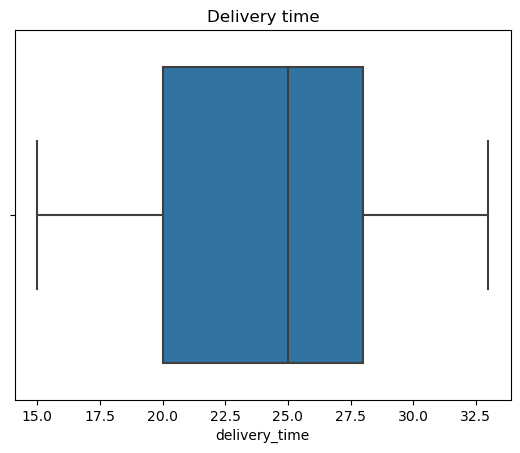

In [229]:
# Boxplot on Food preparation time:
plt.title("Food preparation time")
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

#Boxplot on delivery time
plt.title("Delivery time")
sns.boxplot(data=df,x='delivery_time')
plt.show()

##### Observation on food processing time and delivery time:

1. Food preparation time for the orders ranges from 20 minutes to 35 minutes and the median order value is 27 minutes.

2. Delivery time for the orders ranges from 15 minutes to 33 minutes and the median order value is 25 minutes.

3. It has been observed that food preparation time is more than the delivery time for the orders.

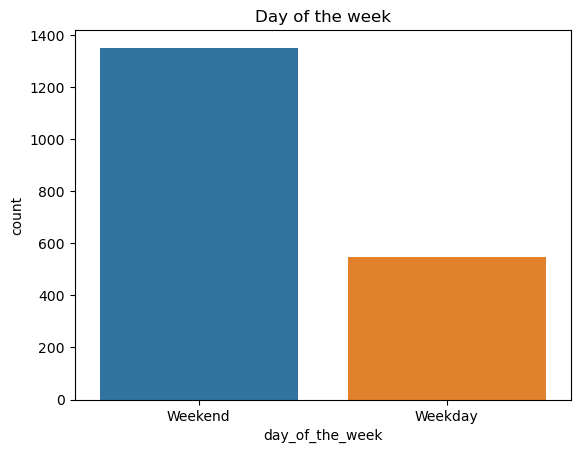

In [230]:
#Countplot on day_of_the_week:
plt.title("Day of the week")
sns.countplot(data=df,x='day_of_the_week')
plt.show()

##### Observation on order placed: 

1. Out of 1898 total orders, 71% orders (nearly 1351 orders) has been placed on Weekends.
2. Only 29% of the orders has been placed on Weekdays. 
3. We can clearly see that orders placed on Weekends is more than the weekday.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [231]:
# Write the code here
top_5 = df['restaurant_name'].value_counts().head()
print(top_5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:

Based on the order placed below are the top 5 restautants :

1. Shake Shacks takes the top position with 219 orders.
2. The Meatball shop takes the 2nd postition with 132 orders.
3. Blue Ribbon Sushi is the third with 119 orders followed by Blue ribbon fried Chicken and Parm with 96 and 68 orders respectively.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [232]:
# Write the code here
popular_cuisine = df.groupby(['day_of_the_week'])['cuisine_type'].value_counts()
print(popular_cuisine['Weekend'])

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64


#### Observations:

Below are the most popular cuisine on weekends:

1. American cuisine takes the top spot with 415 orders placed by the customers.
2. With 335 orders placed by the customers Japanese takes the second position.
3. Italian with 207 orders takes the third place followed by Chinese and Mexican with 163 and 53 orders respectively

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [233]:
# Write the code here
order_count = df[df['cost_of_the_order']>20].count()
print("Orders that cost more than 20 dollars is",order_count['cost_of_the_order'])


percent_order_above20 = round((order_count['cost_of_the_order']*100) / df['order_id'].count(),2)
print("The percentage of order that cost more than 20 dollars is",percent_order_above20)

Orders that cost more than 20 dollars is 555
The percentage of order that cost more than 20 dollars is 29.24


#### Observations:

Out of 1898 orders, orders that cost more than 20 dollars is 555

The percentage of order that cost more than 20 dollars is 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [234]:
# Write the code here
avg_del_time = round(df['delivery_time'].mean(),2)
print("The average order delivery time is",avg_del_time)


The average order delivery time is 24.16


#### Observations:

The average order delivery time is 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [167]:
# Write the code here
df['customer_id'].value_counts().head(9)


52832     13
47440     10
83287      9
250494     8
259341     7
82041      7
65009      7
276192     7
97079      6
Name: customer_id, dtype: int64

#### Observations:

The Top 5 customer Id's and the number of orders they placed.

1. Customer Id 52832 with 13 orders placed.

2. Customer Id 47440 with 10 orders placed.

3. Customer Id 83287 with  9 orders placed.

4. Customer Id 250494 with 8 orders placed.

5. Customer Id 259341,82041,65009 and 276192 with 7 orders placed.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


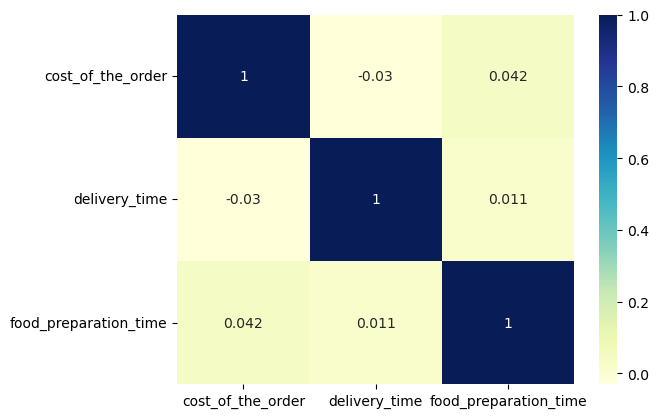

In [266]:
# Write the code here
sns.heatmap(data=df[['cost_of_the_order','delivery_time','food_preparation_time']].corr(), annot=True, cmap='YlGnBu');

#### Observation :

From the heatmap, it seems that there is weak correlation exists between the cost, deliverytime and food preparation time.

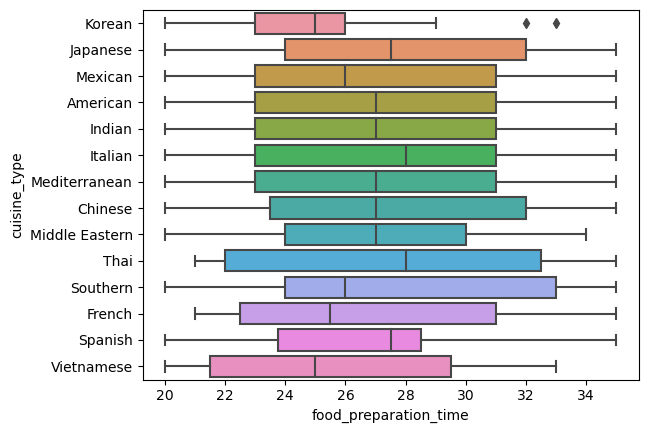

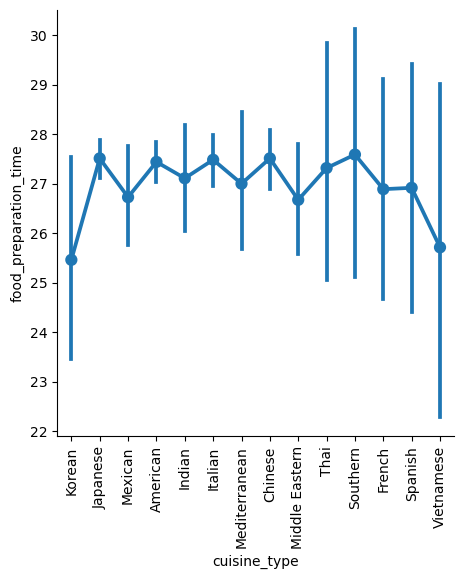

In [32]:
#Barplot on cost of the order and restaurant_name
sns.boxplot(data=df,x='food_preparation_time',y='cuisine_type')
plt.show()
sns.catplot(data = df, x = 'cuisine_type',y = 'food_preparation_time',kind = 'point')
plt.xticks(rotation=90)
plt.show();

##### Observation:

It has been observed that almost all cuisines have avaerage food prepration time.

Although there are outliers in Korean cuisines it can be ignored. 

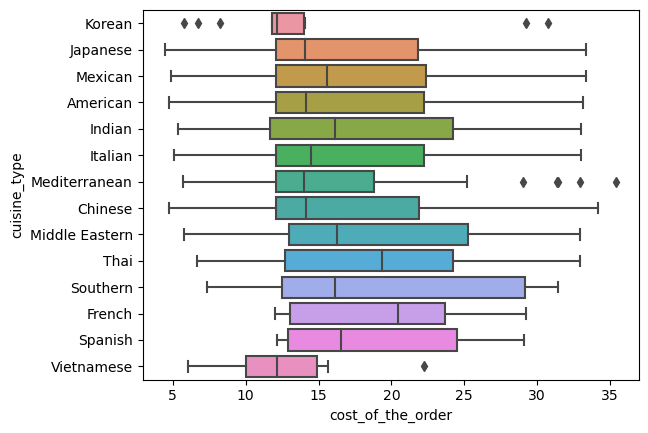

In [33]:
#Barplot on cost of the order and cuisine_type
sns.boxplot(data=df, x='cost_of_the_order',y='cuisine_type')
plt.show()


##### Observation:

1. Cost of the order for cuisines like American, Japanese, Italian and Mexican has almost same cost.

2. It seems that data are bit right skewed.

3. Cuisines like Korean and Mediterranean has outliers which can be ignored.

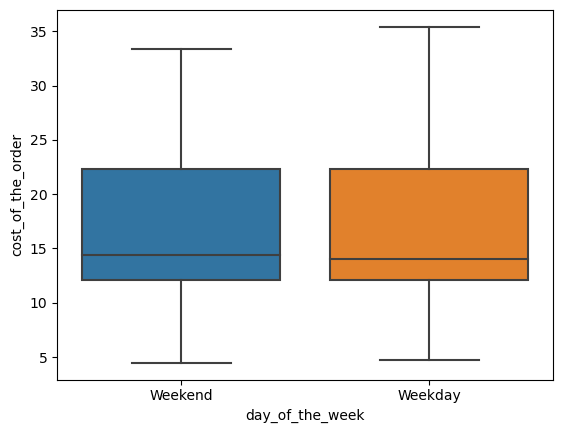

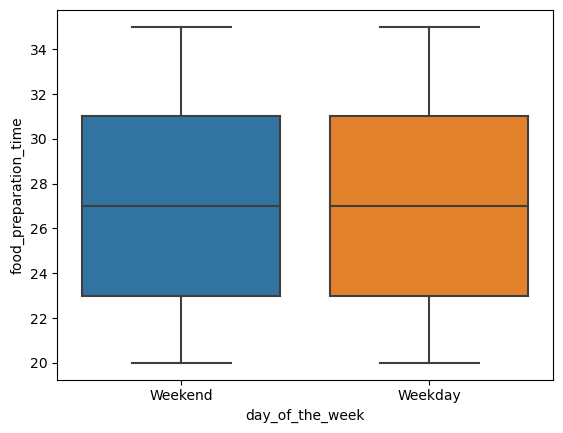

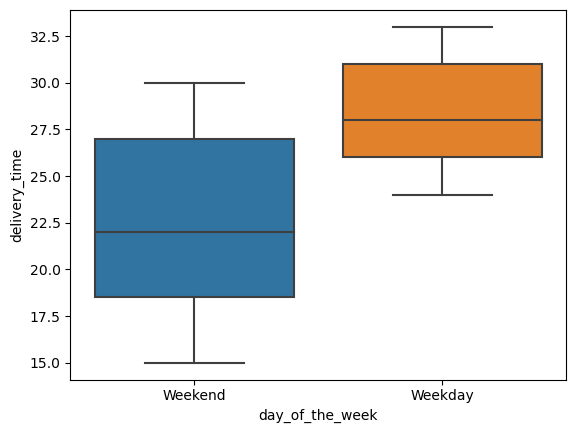

In [34]:
sns.boxplot(data=df,x='day_of_the_week',y='cost_of_the_order') 
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time') 
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time') 
plt.show()

#### Observation:

1. The average delivery time of the orders on Weekdays is 28.3 minutes and on Weekends is 22 minutes.
2. It has been obsereved it takes longer to deliver orders on Weekdays than Weekends.
3. Food prepation time is almost same on weekdays and weekends.

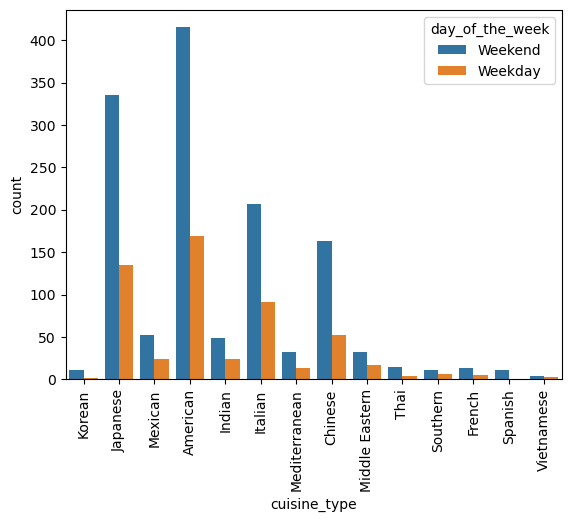

In [35]:
sns.countplot(data=df,x='cuisine_type',hue= 'day_of_the_week')
plt.xticks(rotation=90)
plt.show()

#### Observation:

1. It is noted that Weekends has more order than weekdays which means demand is more on weekends than weekdays.

2. Almost all cuisines follow same pattern.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [155]:
# Write the code here
#converting rating to numerical value 
df['rating'] = df['rating'].replace(['Not given'],0)

#Create a data set of Restaurants with a consideration of mean rating greater than 4. 
df2 = df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').mean()> 4  

#..and reset the index
df2.reset_index(inplace=True)

# Create a data set of Restaurants with a consideration of count of rating greate than 50.Equally in this case unrated orders are not considered.
df3 = df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').count()> 50

df3.reset_index(inplace=True)
# Create a set of Restaurants that meet both conditions using merge
restaurants = pd.merge(df3[df3['rating']== True], df2[df2['rating']== True],on ='restaurant_name')

print(restaurants)



             restaurant_name  rating_x  rating_y
0  Blue Ribbon Fried Chicken      True      True
1          Blue Ribbon Sushi      True      True
2                Shake Shack      True      True
3          The Meatball Shop      True      True


#### Observations:

Four Restaurants :

Blue Ribbon Fried Chicken 

Blue Ribbon Sushi 

Shake Shack  and 

The Meatball Shop  qualify for the promotional offer


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [37]:
## Write the code here
#Variable to hold the revenue
net_revenue=0
sum=0
#Looping thorough the cost to get net_revenue
for i in df['cost_of_the_order']:
    if(i>5 and i<20):
        sum= i*0.15
    elif(i>20):
        sum=i*0.25
    else:
        sum=0
    net_revenue=net_revenue+sum
    
#printing the net revenue generated
print("The net revenue generated is",round(net_revenue,2),"dollars")

The net revenue generated is 6166.3 dollars


#### Observations:

The net revenue generated by the company across all orders is $6166 assuming there is no commission for the orders below 5 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [20]:
# Write the code here
#Adding up the total time
total_time = df['food_preparation_time'] + df['delivery_time']
#count variable for initialising
count=0
for i in total_time:
    if (i>60):
        count+=1
percent_delivered = round((count/len(df['order_id']) )*100 ,2)
print('The percentage of orders that takes more than 60 minutes to deliver is',percent_delivered)

The percentage of orders that takes more than 60 minutes to deliver is 10.54


#### Observations:

Out of 1898 orders, 11% of orders takes more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [168]:
# Write the code here
avg_del_time = round(df.groupby(['day_of_the_week'])['delivery_time'].mean(),2)
avg_del_time

day_of_the_week
Weekday    28.34
Weekend    22.47
Name: delivery_time, dtype: float64

#### Observations:

1. The average delivery time of the orders on Weekdays is 28.3 minutes.
2. The average delivery time of the orders on Weekend is 22 minutes.
3. It has been obsereved it takes longer to deliver orders on Weekdays than Weekends. 

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

1. From analysis, it is clearly seen that almost 38% of the orders are not rated. A question that arises is that unrated order would skew the rating in one direction.

2. The average delivery time is more on weekdays than weekends.

3. It is observed that demand is more on weekends than weekdays. 

4. American cuisine is the mostly preferred by customers followed by Japanese and Italian. 

5. Average order cost value is around 16 dollars and it takes a sudden peak around 25 dollars and its bit rightly skewed. 

6. Food prepration time remains the same on weekdays as well as weekends. 

7. It has also been observed that customers are in tie for promotional offers in 4th place. 

### Recommendations:

1. Ask customers to rate all their orders. We can arrive at better business decision if all customer orders are rated. Also, reward can be given to the customers to make them rate their orders.

2. Also, promotional offers/discount can be given to increase the sales on weekdays. It is clearly seen that demand is more on weekends. 

3. The delivery time can be improved on the orders. A question that arises is : Is it beacuse of traffic there is longer delivery time on weekdays than weekends though only few orders are placed on weekdays.

4. Promotional offers can also be given to the customers who takes the same place.

5. Discounts/offers can be rolled out to the most preferred cuisine by the customers to boost sales. 

6. Also, better marketing can be done the team among the customers to use the app to increase the sales. Also, introductory offera can be given to attract new customers.  

---